In [1]:
#import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the data

In [4]:
diabetic_data= pd.read_csv('diabetic_data.csv')

In [5]:
#view the first five rows

In [6]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
#get more info about the columns

In [8]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#select columns to convert to strings

In [10]:
cols_to_str= ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

In [11]:
#change datatypes from int to strings

In [12]:
diabetic_data[cols_to_str] = diabetic_data[cols_to_str].astype(str)

In [13]:
#view data types

In [14]:
diabetic_data.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [15]:
#view shape of dataframe

In [16]:
diabetic_data.shape

(101766, 50)

In [17]:
#view first ten rows of weight column

In [18]:
col_with_values_to_replace= ['weight', 'gender', 'race', 'admission_source_id']
diabetic_data[col_with_values_to_replace].head(10)

,weight,gender,race,admission_source_id
0,?,Female,Caucasian,1
1,?,Female,Caucasian,7
2,?,Female,AfricanAmerican,7
3,?,Male,Caucasian,7
4,?,Male,Caucasian,7
5,?,Male,Caucasian,2
6,?,Male,Caucasian,2
7,?,Male,Caucasian,7
8,?,Female,Caucasian,4
9,?,Female,Caucasian,4


In [19]:
#replace ? with NaN

In [20]:
diabetic_data[col_with_values_to_replace]=diabetic_data[col_with_values_to_replace].replace('?', np.nan)

In [21]:
#view first ten rows of col_with_values_to_replace

In [22]:
diabetic_data[col_with_values_to_replace].head(10)

,weight,gender,race,admission_source_id
0,NaN,Female,Caucasian,1
1,NaN,Female,Caucasian,7
2,NaN,Female,AfricanAmerican,7
3,NaN,Male,Caucasian,7
4,NaN,Male,Caucasian,7
5,NaN,Male,Caucasian,2
6,NaN,Male,Caucasian,2
7,NaN,Male,Caucasian,7
8,NaN,Female,Caucasian,4
9,NaN,Female,Caucasian,4


In [23]:
#check for missing values in the dataframe

In [24]:
diabetic_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [25]:
#create a 5% treshold for values to drop

In [26]:
threshold=len(diabetic_data)*0.05

In [27]:
print(threshold)

5088.3


In [28]:
#race is the only column with missing values above the threshold
#drop missing values in the race column

In [29]:
diabetic_data.dropna(subset='race', inplace=True)

In [30]:
#View remaining columns with missing values

In [31]:
cols_with_missing_values = diabetic_data.columns[diabetic_data.isna().sum() > 0]
print(cols_with_missing_values)

Index(['weight', 'max_glu_serum', 'A1Cresult'], dtype='object')


In [32]:
#imput the mode in place of missing values
#iterate through the columns with missing values 

In [33]:
for col in cols_with_missing_values: 
    if col in diabetic_data.columns:  # Check if the column exists
        mode_value = diabetic_data[col].mode()[0] 
        diabetic_data[col].fillna(mode_value)

# Research Questions

1. What is the overall distribution of readmission rates?
2. What is the average length of stay in the hospital?
3. What is the most common age group among the patients?
4. What are the most frequent primary diagnoses (`diag_1`)?

5. Is there a relationship between age and readmission rates?
6. Do different genders have different readmission rates?
7. How does race/ethnicity influence readmission rates?

8. Is there a relationship between the number of medications prescribed and readmission rates?

9. Do patients admitted through different sources (e.g., emergency room, physician referral) have different readmission rates?
10. Is there a relationship between the number of lab procedures and readmission rates?


## 1. What is the overall distribution of readmission rates?


In [36]:
#view the proportion of readmissions

In [37]:
readmitted_prop= diabetic_data['readmitted'].value_counts(normalize=True)

In [38]:
print(readmitted_prop) 

readmitted
NO     0.535887
>30    0.351854
<30    0.112259
Name: proportion, dtype: float64


In [39]:
#get the percentages

In [40]:
readmitted_prop* 100

readmitted
NO     53.588695
>30    35.185390
<30    11.225915
Name: proportion, dtype: float64

In [41]:
readmission_rate = (diabetic_data['readmitted'] != 'NO').mean()* 100
print(f"Overall Readmission Rate: {readmission_rate:.2f}%") 

Overall Readmission Rate: 46.41%


In [42]:
#countplot of the 'readmitted' column

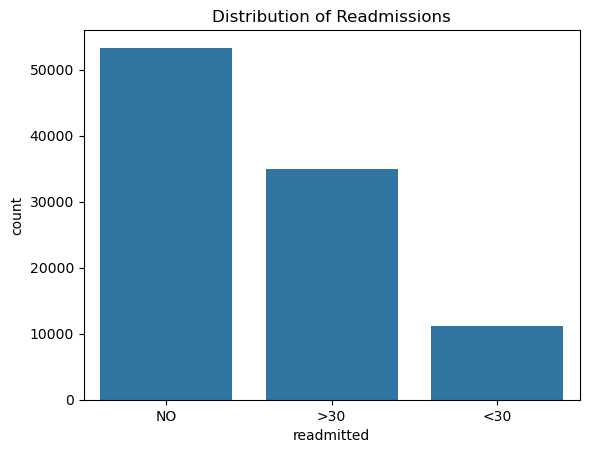

In [43]:
r= sns.countplot(x='readmitted', data= diabetic_data)
plt.xlabel= 'Readmission Status'
plt.ylabel= 'Number of Patients'
r.set_title('Distribution of Readmissions')
plt.show()

## 2. What is the average length of stay in the hospital?

In [45]:
#descriptive statistics for time_in_hospital

In [46]:
time_in_hospital_stats = diabetic_data['time_in_hospital'].agg(['mean', 'median', 'std', 'min', 'max'])
print(time_in_hospital_stats)

mean       4.398420
median     4.000000
std        2.986977
min        1.000000
max       14.000000
Name: time_in_hospital, dtype: float64


In [47]:
#visualize the distribution of time_in_hospital

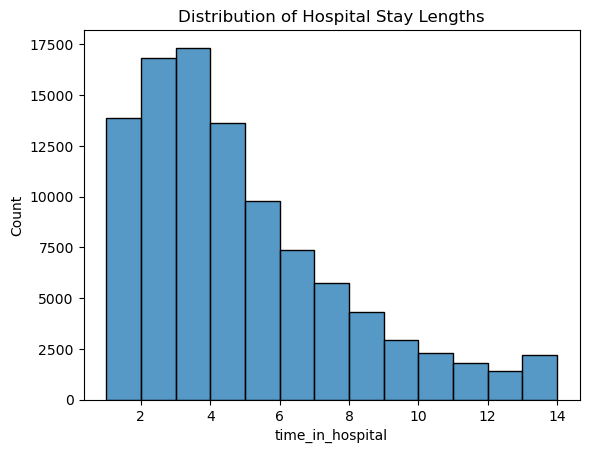

In [48]:
t_h=sns.histplot(x= 'time_in_hospital', data= diabetic_data, binwidth=1)
plt.xlabel= 'Time in Hodspital (Days)'
plt.ylabel= 'Number of Patients'
t_h.set_title('Distribution of Hospital Stay Lengths')
plt.show()

## 3. What is the most common age group among the patients?

In [50]:
#view a countplot of the age column

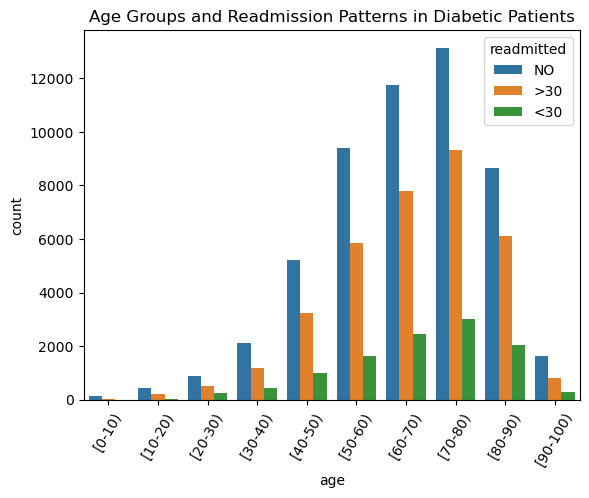

In [51]:
a=sns.countplot(x='age', data= diabetic_data, hue='readmitted')
plt.xlabel= 'Age Group'
plt.ylabel= 'Number of Patients'
a.set_title('Age Groups and Readmission Patterns in Diabetic Patients')
plt.xticks(rotation=60) 
plt.show()

In [52]:
#or find the modal agr group

In [53]:
diabetic_data['age'].mode()

0    [70-80)
Name: age, dtype: object

## 4. What are the most frequent primary diagnoses (diag_1)?

In [55]:
#find the top ten most frequent primary diagnoses

In [56]:
fpd= diabetic_data['diag_1'].value_counts().head(10)
print(fpd)

diag_1
428    6739
414    6407
786    3938
410    3518
486    3425
427    2712
491    2228
715    2099
682    1996
780    1991
Name: count, dtype: int64


*** **Note**: ICD-9 codes:
        **428** corresponds to the diagnosis of Heart failure.
        **414** corresponds to the diagnosis of Other forms of chronic ischemic heart disease. 
        **786** refers to Symptoms involving the respiratory system and other chest symptoms.
        **410** corresponds to the diagnosis of Acute myocardial infarction (heart attack).
        **486** corresponds to the diagnosis of Pneumonia, organism unspecified.
        **427** corresponds to the diagnosis of Cardiac dysrhythmias.
        **491** corresponds to the diagnosis of Chronic bronchitis.
        **715** corresponds to the diagnosis of Osteoarthrosis and allied disorders.
        **682** corresponds to the diagnosis of Other cellulitis and abscess.
        **434** corresponds to the diagnosis of Occlusion of cerebral arteries.

In [58]:
#filter diabetic_data to include only the rows with fpd

In [59]:
top_10_diag_1= diabetic_data[diabetic_data['diag_1'].isin(fpd.index)]

In [60]:
#visualize the top 10 most common diagnoses

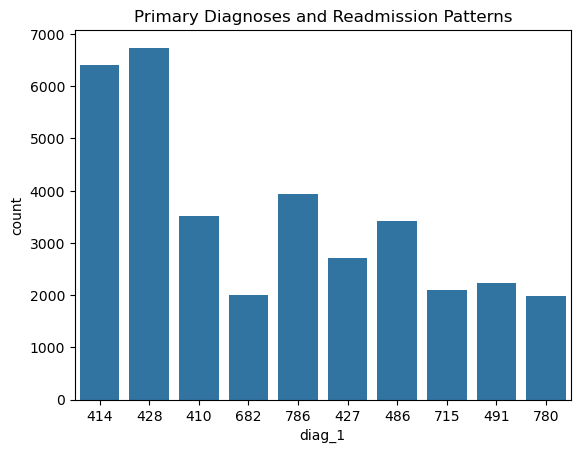

In [61]:
d1= sns.countplot(x='diag_1', data=top_10_diag_1)
plt.xlabel= 'Primary Diagnosis'
plt.ylabel= 'Number of Patients'
d1.set_title('Primary Diagnoses and Readmission Patterns')
plt.show()   

## 5. Is there a relationship between age and readmission rates?

In [63]:
#create a boxplot to visualize the relationship

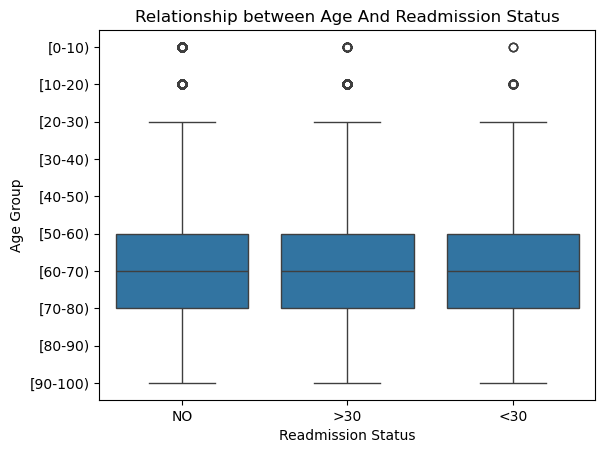

In [64]:
rel_a_r= sns.boxplot(x='readmitted', y='age', data= diabetic_data)
rel_a_r.set (xlabel= 'Readmission Status', ylabel= 'Age Group')
rel_a_r.set_title('Relationship between Age And Readmission Status')
plt.show()

In [65]:
#create a lineplot to view the relationship

## 6. Do different genders have different readmission rates?

In [67]:
#calculate readmission by gender

In [68]:
readmission_rates_by_gender = diabetic_data.groupby('gender')['readmitted'].value_counts(normalize=True).unstack() * 100
print(readmission_rates_by_gender)

readmitted             <30        >30          NO
gender                                           
Female           11.313112  35.944004   52.742884
Male             11.124420  34.301021   54.574558
Unknown/Invalid        NaN        NaN  100.000000


In [69]:
#show boxplots of readmission rates for different genders

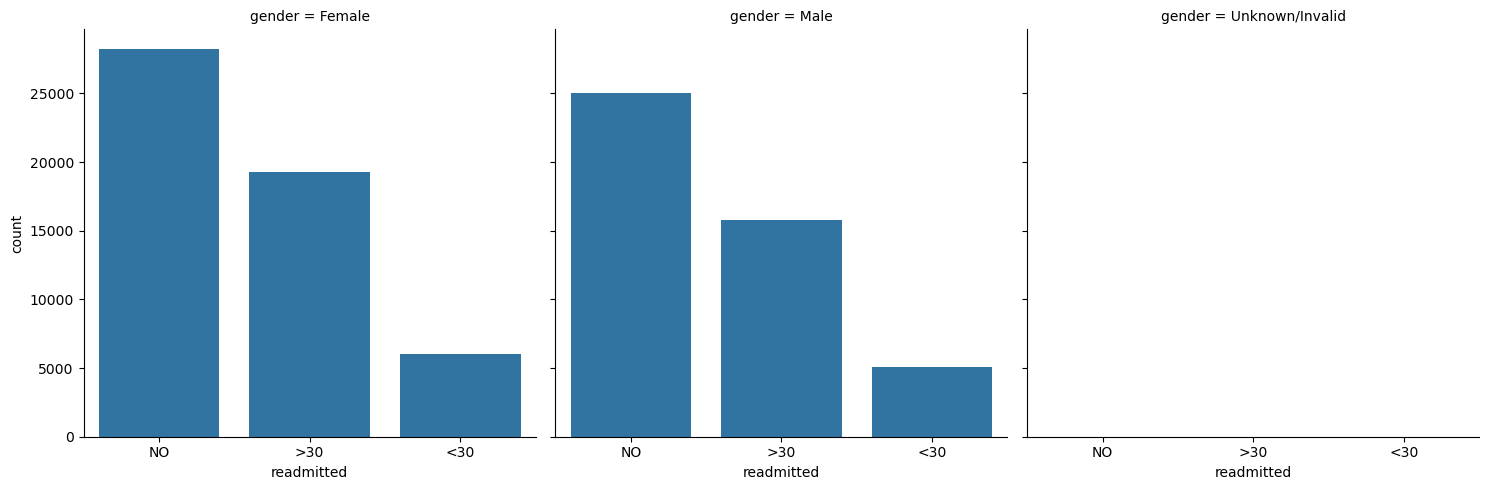

In [70]:
sns.catplot(x='readmitted', data= diabetic_data, kind= 'count', col='gender')

## 7. How does race/ethnicity influence readmission rates

In [72]:
#calculate readmission by race

In [73]:
readmission_rates_by_race = diabetic_data.groupby('race')['readmitted'].value_counts(normalize=True).unstack() * 100
print(readmission_rates_by_race)

readmitted             <30        >30         NO
race                                            
AfricanAmerican  11.218116  34.534097  54.247788
Asian            10.140406  25.117005  64.742590
Caucasian        11.290556  35.643044  53.066400
Hispanic         10.407462  31.516937  58.075601
Other             9.628154  29.614874  60.756972


In [74]:
#view the countplot of readmission status with hue set to race

<Axes: xlabel='readmitted', ylabel='count'>

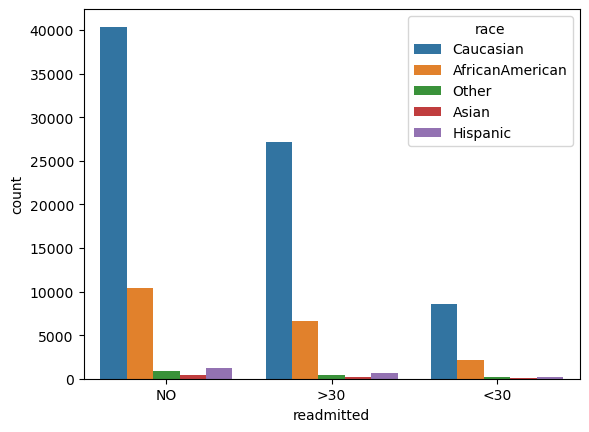

In [75]:
sns.countplot(x='readmitted', data=diabetic_data, hue='race')

## 8. Is there a relationship between the number of medications prescribed and readmission rates? 

In [77]:
#calculate mean number of medications per readmission status

In [78]:
readmission_rates_by_np= diabetic_data.groupby('readmitted')['num_medications'].mean()
print(readmission_rates_by_np)

readmitted
<30    16.927926
>30    16.273945
NO     15.675394
Name: num_medications, dtype: float64


In [79]:
#create a scatterplot to visualize the relationship

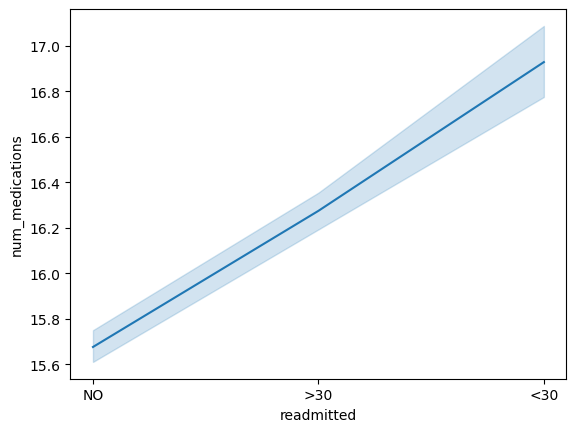

In [80]:
sns.lineplot(x='readmitted', y='num_medications', data=diabetic_data)
plt.show()

## 9. Do patients admitted through different sources (e.g., emergency room, physician referral) have different readmission rates?

In [82]:
#calculate readmission by source

In [83]:
readmission_rates_by_source = diabetic_data.groupby('admission_source_id')['readmitted'].value_counts(normalize=True).unstack() * 100
print(readmission_rates_by_source)

readmitted                 <30        >30          NO
admission_source_id                                  
1                    10.667129  32.895512   56.437359
10                         NaN  28.571429   71.428571
11                         NaN        NaN  100.000000
13                         NaN        NaN  100.000000
14                         NaN        NaN  100.000000
17                   10.435951  36.249627   53.314422
2                    10.460653  28.598848   60.940499
20                   13.750000  50.625000   35.625000
22                   16.666667  25.000000   58.333333
25                         NaN        NaN  100.000000
3                    15.508021  31.016043   53.475936
4                     9.879437  21.701273   68.419290
5                    11.792453  27.594340   60.613208
6                     8.999497  18.049271   72.951232
7                    11.731883  37.777228   50.490889
8                    12.500000  25.000000   62.500000
9                    18.5185

*** **Note** admission_source_id
description
1-Physician Referral, 2-Clinic Referral, 3_HMO Referral, 4-Transfer from a hospital, 5-Transfer from a Skilled Nursing Facility (SNF), 6-Transfer from another health care facility, 7-Emergency Room, 8-Court/Law Enforcement
, 9-
Not Available
, 10-
Transfer from critial access hospital
, 11-
Normal Delivery
, 12-
Premature Delivery
, 13-
Sick Baby
, 14-
Extramural Birth
, 15-
Not Available
, 17-
NULL
, 18-
Transfer From Another Home Health Agency
, 19-
Readmission to Same Home Health Agency
, 20-
Not Mapped
, 21-
Unknown/Invalid
, 22-
Transfer from hospital inpt/same fac reslt in a sep claim
, 23-
Born inside this hospital
, 24-
Born outside this hospital
, 25-
Transfer from Ambulatory Surgery Center
, 26-
Transfer from Hospice

In [85]:
#view distribution of the admission_source_id

<function matplotlib.pyplot.show(close=None, block=None)>

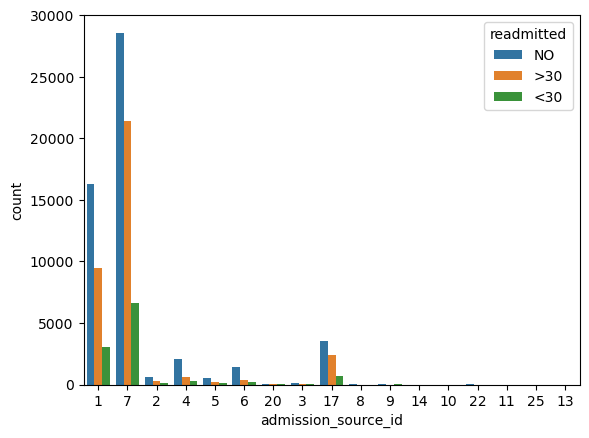

In [86]:
sns.countplot(x='admission_source_id', data=diabetic_data, hue='readmitted')
plt.show

## Distribution of Hospital Length of Stay by Readmission Rates

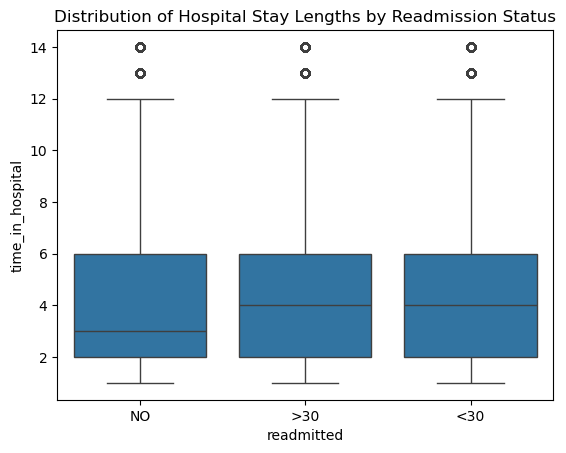

In [88]:
t=sns.boxplot(x='readmitted', y='time_in_hospital', data= diabetic_data)
plt.xlabel= 'Readmission Status'
plt.ylabel= 'Time in Hospital (Days)'
t.set_title('Distribution of Hospital Stay Lengths by Readmission Status')
plt.show()